In [1]:
import cv2

In [2]:
print(cv2.__version__)

4.0.1


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import cv2

In [6]:
img=cv2.imread('./aaa.jpg',0)#0为灰度图  1为彩色图
img.shape
cv2.imshow('girl',img)
key=cv2.waitKey(0)
if key== 27:#27为esc
    cv2.destroyAllWindows()

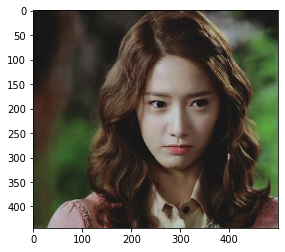

In [9]:
#图为彩色
image=cv2.imread('./aaa.jpg',1)#通道为BGR 
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))#转换色彩
plt.show()

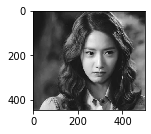

In [13]:
#图为灰色
img_gray=cv2.imread('./aaa.jpg',0)
plt.figure(figsize=(2,2))#调整图片大小
plt.imshow(img_gray,cmap='gray')
plt.show()

/Users/wangchenxu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/wangchenxu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


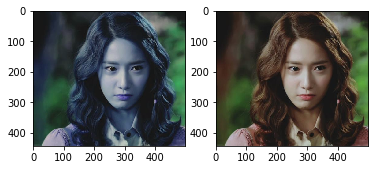

In [15]:
#设置两个图片并排显示
img1=cv2.imread('./aaa.jpg',1)
plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_RGB2BGR))
plt.show()

In [40]:
def myshow(img,ksize=(3,3)):
    img2=cv2.imread(img,1)
    
    plt.figure(figsize=ksize)
    #img2[150:300][100:200]为image crop
#     plt.imshow(cv2.cvtColor(img2[150:300][100:200],cv2.COLOR_RGB2BGR))
    plt.imshow(cv2.cvtColor(img2,cv2.COLOR_RGB2BGR))
    plt.show()
    
    

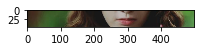

In [31]:
myshow('./aaa.jpg')

In [3]:
img_caise=cv2.imread('./aaa.jpg',1)
img_gray=cv2.imread('./aaa.jpg',0)

In [33]:
B,G,R=cv2.split(img_caise)

In [35]:
cv2.imshow('B',B)
cv2.imshow('G',G)
cv2.imshow('R',R)
key=cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

In [22]:
def image_cooler(img,b_increase,r_decrease): #把图片变冷  红色通道值越大 越亮 所以增加蓝色 减少红色
    B,G,R=cv2.split(img)
    plt.subplot(131)
    plt.imshow(cv2.cvtColor(B,cv2.COLOR_BGR2RGB))
    plt.subplot(132)
    plt.imshow(cv2.cvtColor(G,cv2.COLOR_BGR2RGB))
    plt.subplot(133)
    plt.imshow(cv2.cvtColor(R,cv2.COLOR_BGR2RGB))
    plt.show()
    b_lim=255-b_increase# 给蓝色一个上限 判断是否大于255
    B[B>b_lim]=255#大于的话等于255 否则 加值
    B[B<=b_lim]=(b_increase+B[B<=b_lim]).astype(img.dtype)
  
    r_lim=r_decrease#同理  
    R[R<r_lim]=0#本身的值小于要减的值的话 = 0 否则减值
    R[R>=r_lim]=(R[R>=r_lim]-r_decrease).astype(img.dtype)
    return cv2.merge((B,G,R))
    

In [28]:
def my_show(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR))
    plt.show()

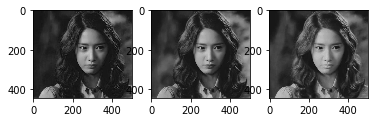

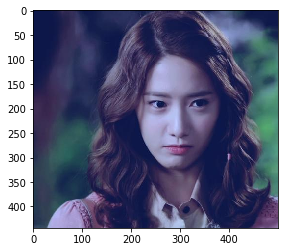

In [30]:
cooler_image=image_cooler(img_caise,50,10)
my_show(cooler_image)

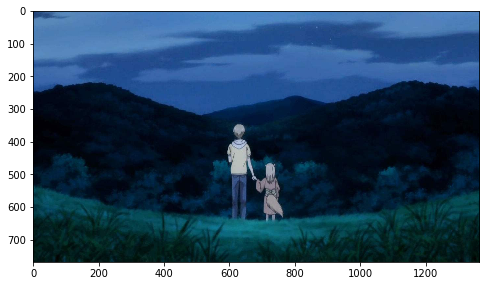

In [41]:
## Gamma Change
myshow('./bbb.jpg',ksize=(8,8))

In [44]:
#摄像头内置的 gamma变换 
def adjust_gamma(img,gamma=1.0):
    invGama=1.0/gamma
    table=[]
    for i in range(256):
        table.append(((i/255.0)**invGama)*255)
    table=np.array(table).astype('uint8')
    return cv2.LUT(img,table)

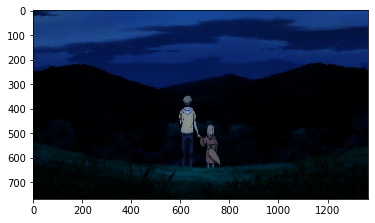

In [53]:
img_drak=cv2.imread('./bbb.jpg',1)
img_brighter=adjust_gamma(img_drak,0.5)
my_show(img_brighter)

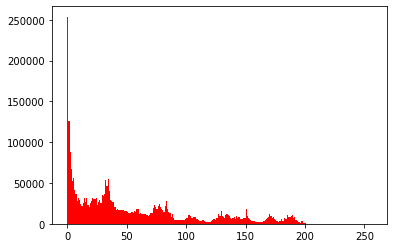

In [54]:
#直方图均衡
plt.hist(img_drak.flatten(),256,[0,256],color='r')
plt.show()

In [57]:
img_yuv=cv2.cvtColor(img_drak,cv2.COLOR_BGR2YUV)#先把BGR通道变成YUV通道
img_yuv[:,:,0]=cv2.equalizeHist(img_yuv[:,:,0])#对Y通道进行直方值均衡 前两项为shape 最后为通道名 0Y  1U 2V
img_output=cv2.cvtColor(img_yuv,cv2.COLOR_YUV2BGR)#再把图片转回去


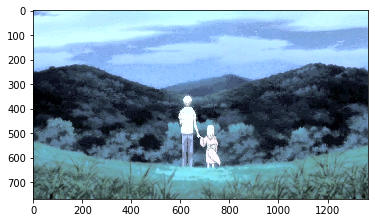

In [58]:
my_show(img_output)#打印出来

In [11]:
#知识点:
#1.调亮度用YUV，调颜色用HSV

#投影变换
pst1=np.float32([[0,0],[0,500],[500,0],[500,500]])
pst2=np.float32([[5,19],[19,460],[460,9],[410,420]])
m=cv2.getPerspectiveTransform(pst1,pst2)
img_warp=cv2.warpPerspective(img_gray,m,(500,500))

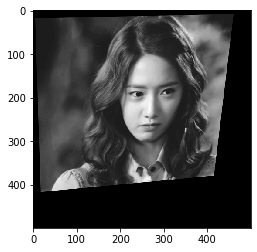

In [13]:
plt.imshow(img_warp,cmap='gray')
plt.show()

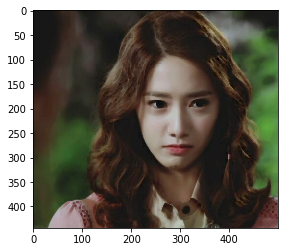

In [18]:
#腐蚀跟膨胀
#腐蚀是把白版的地方腐蚀掉
erode_img=cv2.erode(img_caise,None,iterations=1)
plt.imshow(cv2.cvtColor(erode_img,cv2.COLOR_BGR2RGB))
plt.show()


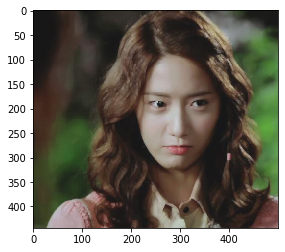

In [20]:
#膨胀是对白色的地方进行膨胀
dilate_img=cv2.dilate(img_caise,None,iterations=1)
plt.imshow(cv2.cvtColor(dilate_img,cv2.COLOR_BGR2RGB))
plt.show()

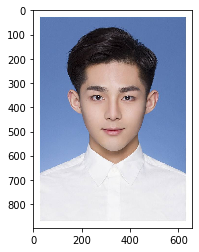

In [28]:
zj_img=cv2.imread('./zhenjian.jpg')
plt.imshow(cv2.cvtColor(zj_img,cv2.COLOR_BGR2RGB))
row,cols,channels=zj_img.shape
plt.show()

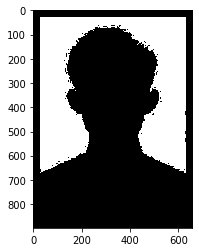

In [33]:
hsv=cv2.cvtColor(zj_img,cv2.COLOR_BGR2HSV)
lower_blue=np.array([78,43,46])
upper_blue=np.array([110,255,255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)
plt.imshow(cv2.cvtColor(mask,cv2.COLOR_BGR2RGB))
plt.show()

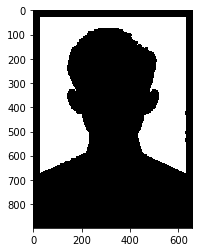

In [21]:
#膨胀小的黑边去掉  腐蚀小的白边去掉
dilate_img=cv2.dilate(mask,None,iterations=5)
plt.imshow(cv2.cvtColor(dilate_img,cv2.COLOR_BGR2RGB))
erode_mask=cv2.erode(dilate_img,None,iterations=5)
plt.imshow(cv2.cvtColor(erode_mask,cv2.COLOR_BGR2RGB))
plt.show()

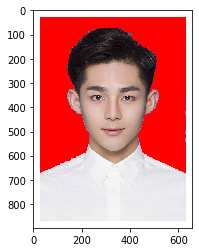

In [24]:
for i in range(row):
    for j in range(cols):
        if erode_mask[i,j]==255:
            zj_img[i,j]=(0,0,255)
plt.imshow(cv2.cvtColor(zj_img,cv2.COLOR_BGR2RGB))
plt.show()